# Bike Sharing Case Study

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

<font color = blue>**Problem Statement**</font><br>

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

<font color = blue>**Aim of the case study**</font><br>

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

Let us first import the required libraries and then read the dataset

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check the shape

df.shape

(730, 16)

The dataset has 730 rows and 16 columns.

In [4]:
# check the columns

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# check info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see all the columns have 730 values which means there are no missing values.

In [6]:
# check if there is any null value

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

All columns have 0 null values.

### Data Sanity Check

Let's check if there is any anomaly when we check the equation `casual + registered = cnt`
as cnt should be equal to number of casual bookings plus regustered ones.

In [7]:
((df.cnt == df.casual + df.registered) == False).sum()

0

So this shows there are no such values. 

We can drop following columns:
<br>
- `instant` as it is an index
- `dteday` as it is redundant ; we already have mnth & yr
- `casual` & `registered` as these values will be populated when the user actually books the bike. These variable will not help in making predictions of bike booking.

In [8]:
df = df.drop( columns = ['instant','dteday','casual','registered'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Now we are left with 12 columns.

In [9]:
# lets check the stats here on a high level

df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


Since the data set is clean, we can now proceed towards visualization of data.

## Step 2: Visualising the Data

Let's now visualize the data in graphs and plots.
- We can check if there is some multicollinearity among the data
- Identify if some predictors directly have a strong association with the outcome variable


In [10]:
# Checking number of numerical and categorical values

numerical_var = df.dtypes[df.dtypes !='object'].index
print("Number of Numerical Variables : ", len(numerical_var))
print("Numerical variables : ",numerical_var)

categorical_var = df.dtypes[df.dtypes =='object'].index
print("Number of Categorical Variables : " ,len(categorical_var))
print("Categorical variables : ",categorical_var)

Number of Numerical Variables :  12
Numerical variables :  Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
Number of Categorical Variables :  0
Categorical variables :  Index([], dtype='object')


There are no categorical values as such but there are binary encoding values in some columns like workingday, holiday etc.
<br>Lets do a pair plot first.

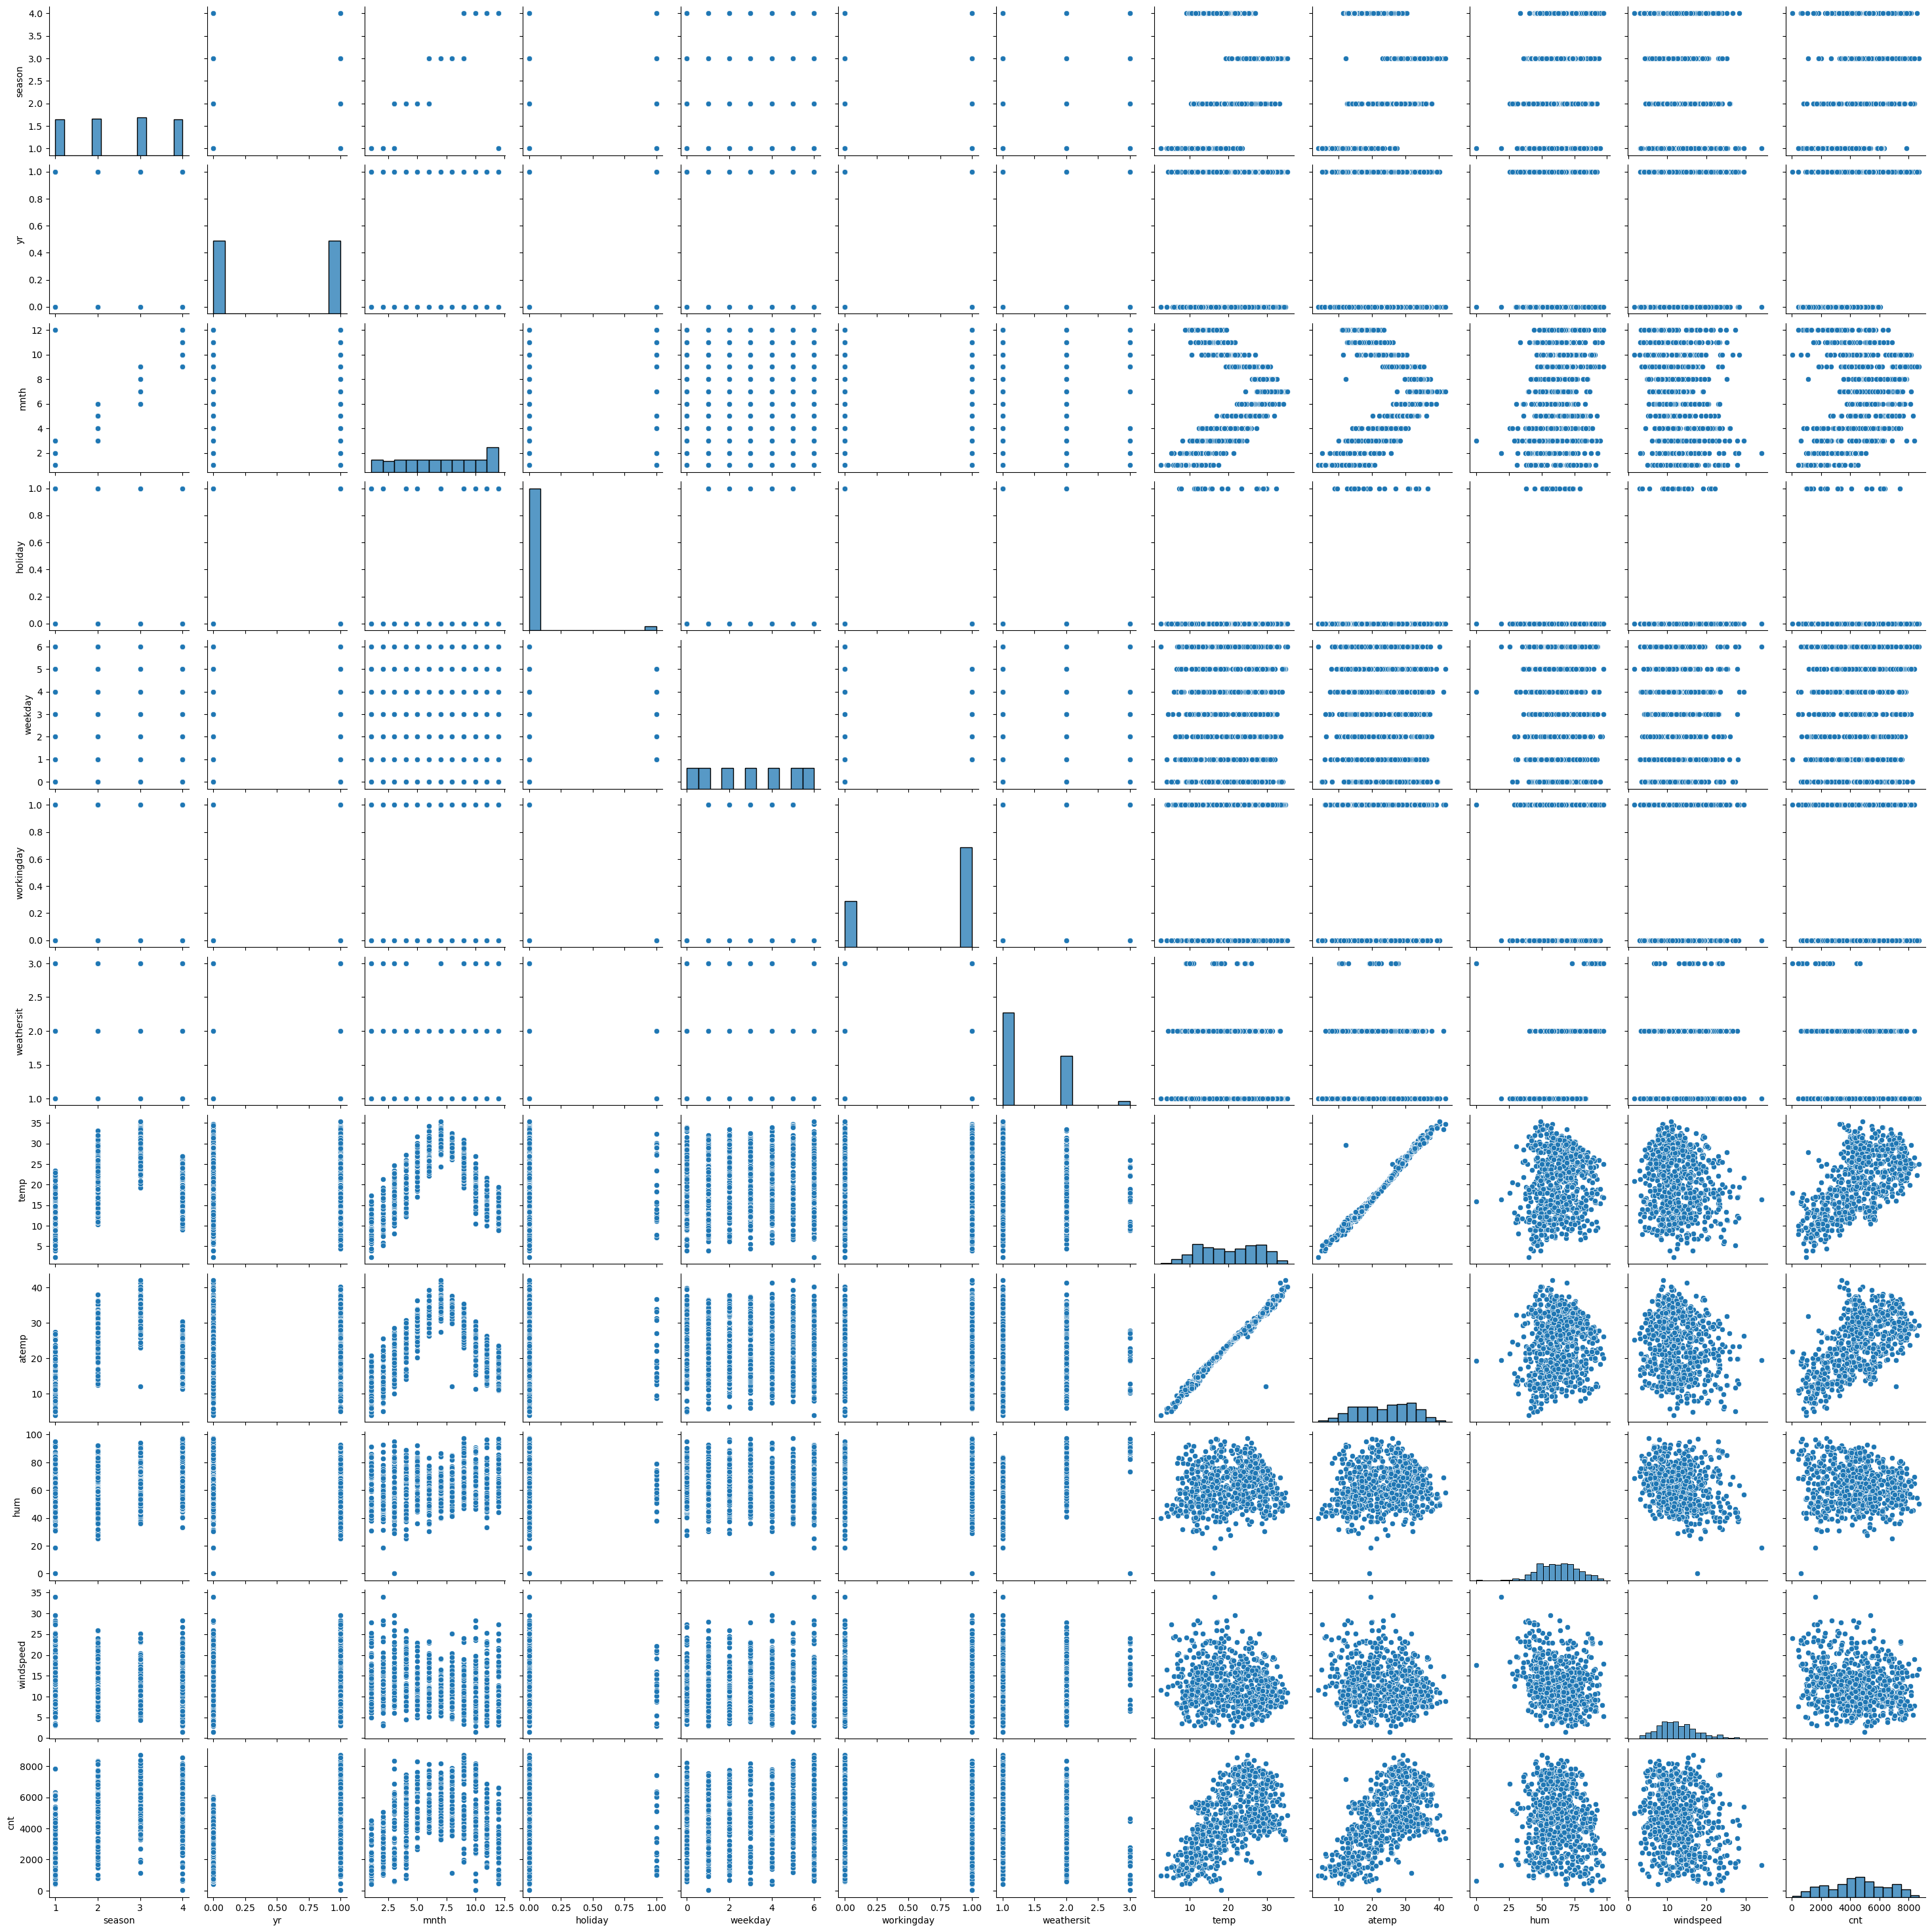

In [11]:
sns.pairplot(df)
plt.show()

Since this pairplot at this point of time is not giving any proper indication. 
<br>Lets work towards creating categorical variables for `season` , `weathersit` , `mnth` and `weekday`.

#### Season

In [12]:
# values in season column

df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

**As per data dictionary :**
<br>
<br> 1 : spring <br> 2 : summer <br> 3 : fall <br> 4 : winter

In [13]:
# Defining the mapping function

def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the dataset
df[['season']] = df[['season']].apply(season_map)
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

This is same as the earlier values.

#### Weathersit

In [14]:
# values in weathersit column

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

**As per data dictionary :**
<br>
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


since the texts are very lengthy here, lets use following terms for each category:
- 1 : clear
- 2 : misty
- 3 : light_rain
- 4 : heavy_rain

In [15]:
# Defining the mapping function

def weather_map(x):
    return x.map({1:'clear', 2:'misty', 3:'light_rain', 4:'heavy_rain'})

# Applying the function to the dataset
df[['weathersit']] = df[['weathersit']].apply(weather_map)
df.weathersit.value_counts()

clear         463
misty         246
light_rain     21
Name: weathersit, dtype: int64

#### Mnth

In [16]:
# values in mnth column

df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

Here the numbers denote the month of the year for e.g. 1 : Jan, 2: Feb.... 12: Dec
<br> So lets convert them to categorical values as well.

In [17]:
df.mnth=df.mnth.apply(lambda x:calendar.month_abbr[x])
df.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

#### Weekday

In [18]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [19]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,4,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,5,1,misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,6,0,misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,0,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,1,1,clear,6.184153,7.54440,48.2917,14.958889,1321


Here, we can see that working day is 0 for weekday value 0 & 6. And it is 1 for rest. This tells weekday 0 is Sunday and 6 is Saturday. So let's do encoding according to this.

In [20]:
weekdays_dic ={0:'Sun', 1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri', 6:'Sat'}

df[['weekday']]=df[['weekday']].apply(lambda x:x.map(weekdays_dic))
df.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [21]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Since, data conversion to categorical values are done, lets look into the data visualization now.

#### Lets do the pairplot again now


#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

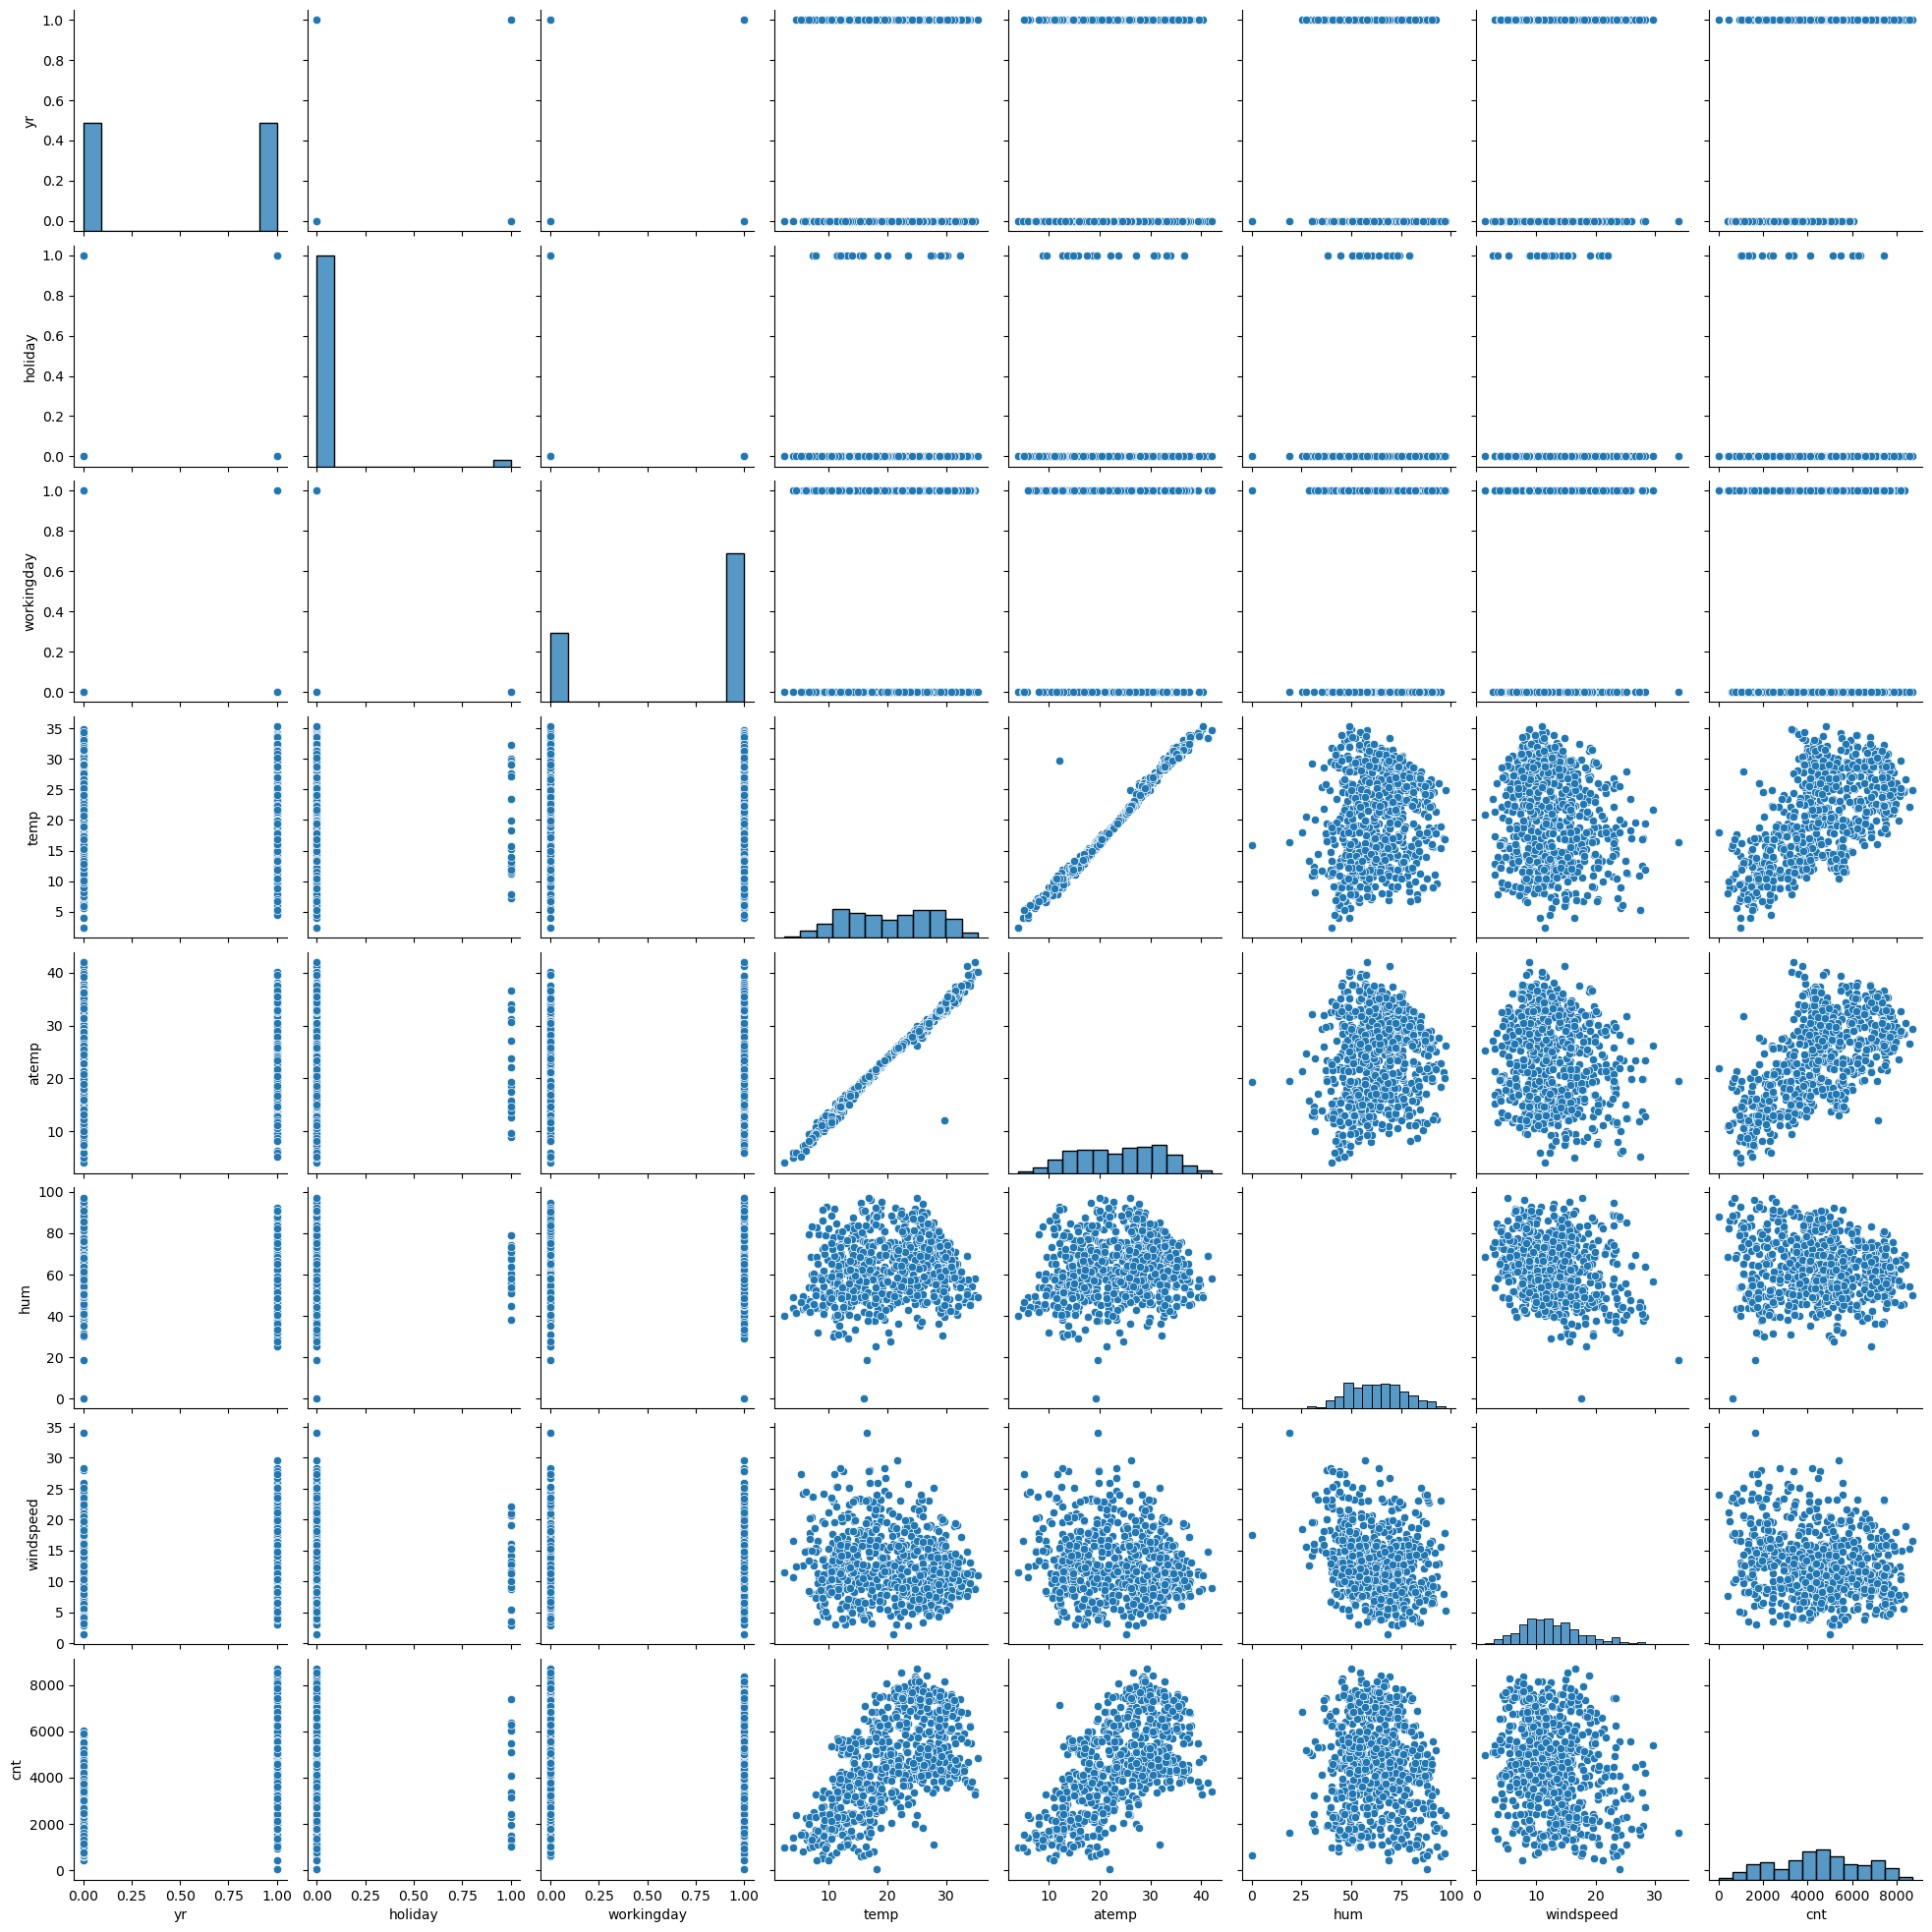

In [22]:
sns.pairplot(df)
plt.show()

<font color = blue>Inference:</font>
- temp and atemp are highly correlated : we can drop one of them going forward based on VIF and p-value.
- both temp and atemp shows linear relationship with target variable `cnt`
- increase in himidity is resulting in more bike bookings
- less wind speed is resulting in more bike bookings

In [23]:
# lets find the correlation matrix

df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


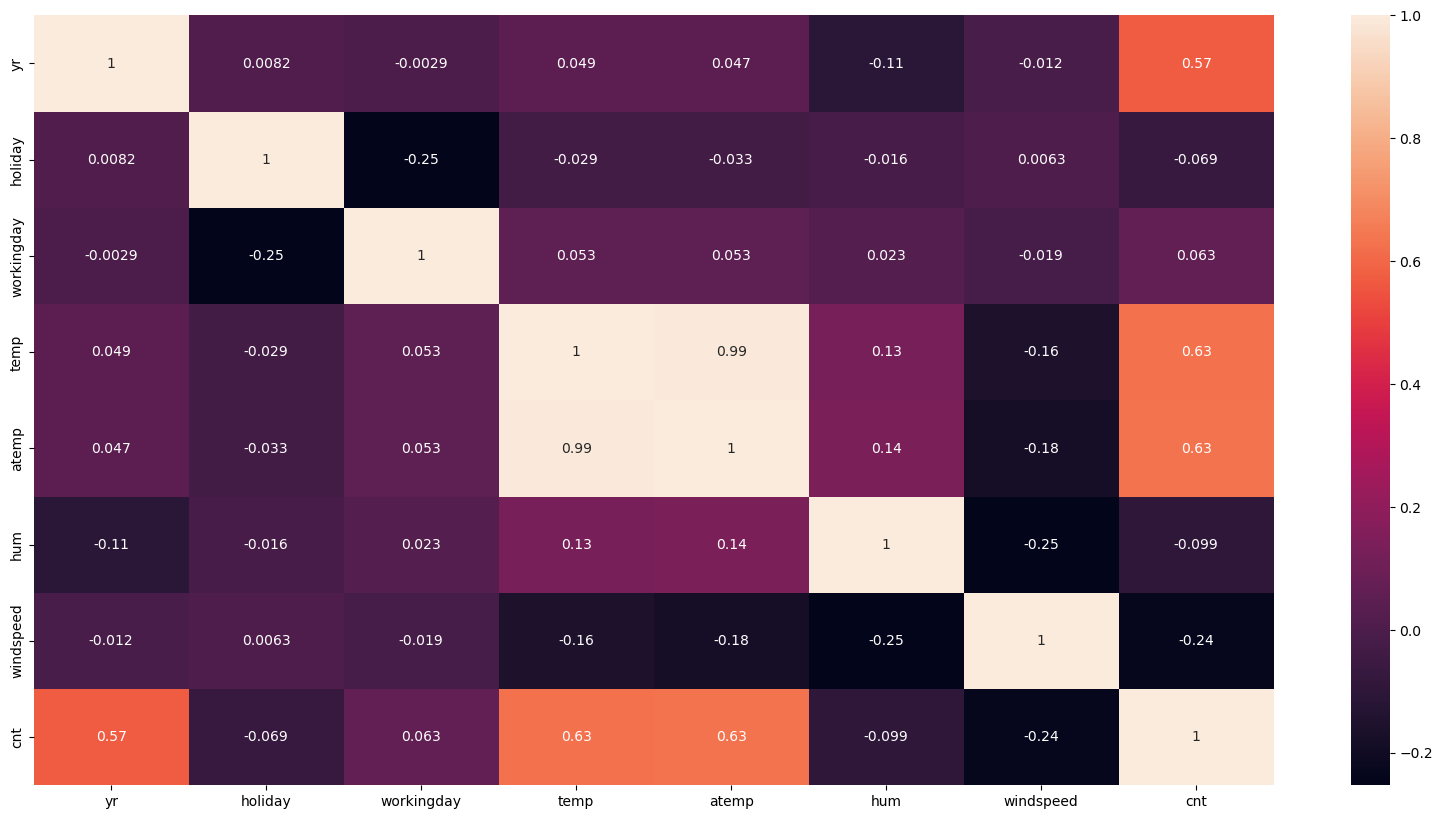

In [24]:
# heatmap

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

<font color = blue>Inference:</font>

- This also shows `temp` & `atemp` are very much correlated (0.99)
- `Cnt` has a positive correlation with `yr`

#### Visualising Categorical Variables

As there are a few categorical variables as well. Let's make a boxplot for some of these variables.

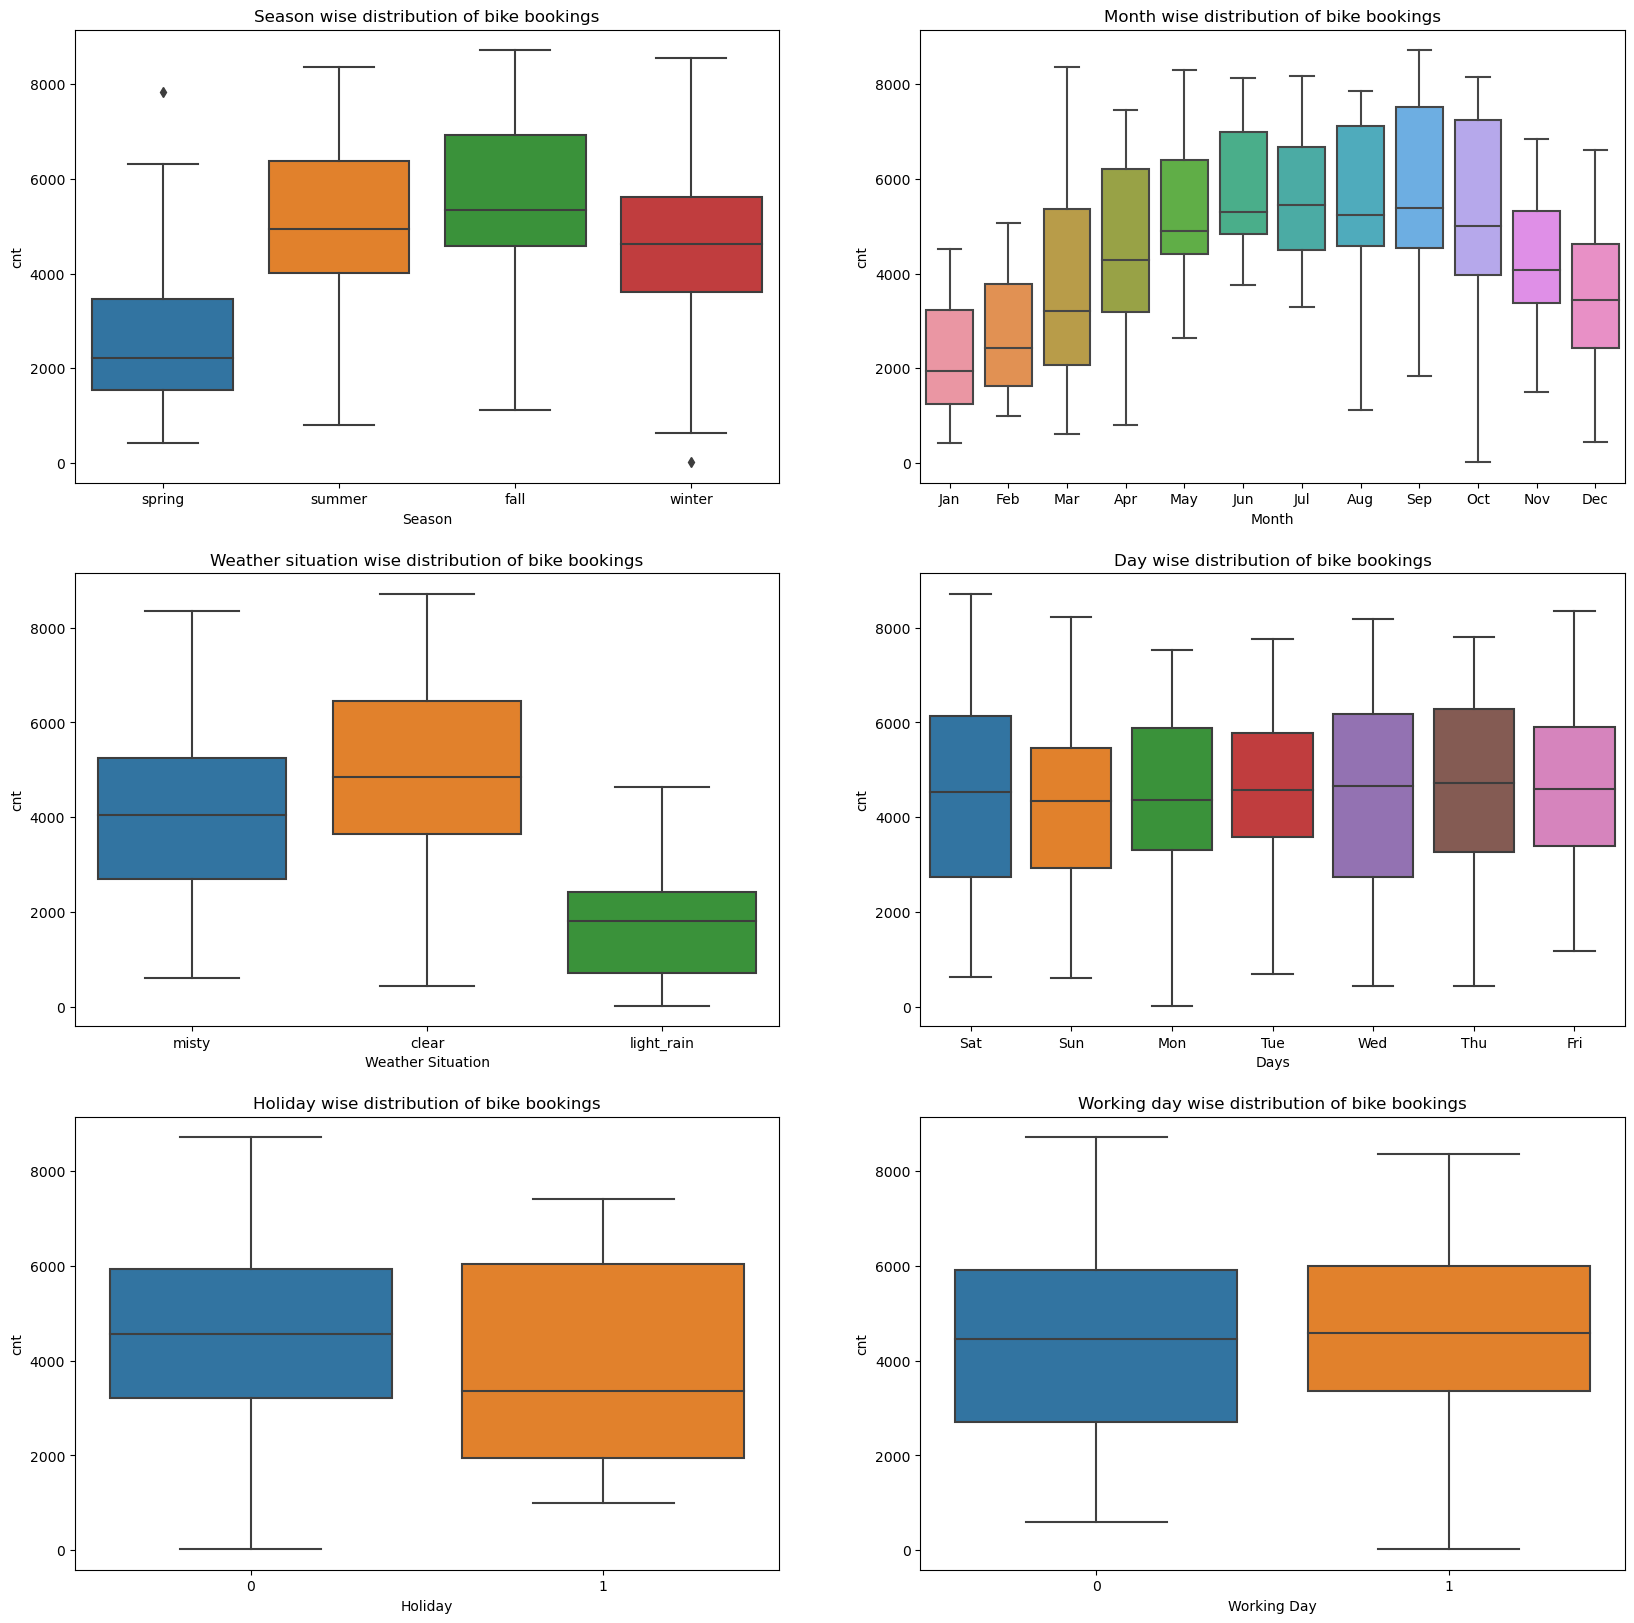

In [25]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df).set(title="Season wise distribution of bike bookings",xlabel ="Season")
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df).set(title="Month wise distribution of bike bookings",xlabel ="Month")
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df).set(title="Weather situation wise distribution of bike bookings",xlabel ="Weather Situation")
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df).set(title="Day wise distribution of bike bookings",xlabel ="Days")
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df).set(title="Holiday wise distribution of bike bookings",xlabel ="Holiday")
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df).set(title="Working day wise distribution of bike bookings",xlabel ="Working Day")

plt.show()

<font color = blue>Inference:</font>
<br><br>
**Season**
- fall season has the most number of bookings done, followed by summer & winter
- spring has the lowest no of bookings
<br><br>
**Month**
- most number of bookings were done in the month from august to october
- least number of bookings were done in the month from november to february
- this shows that month can be  a good parameter for booking
<br><br>
**Weather**
- clear days have the most bookings
- light rain has the least
- there is no data of heavy rain
<br><br>
**Weekday**
- most bookings are done in wednesday, saturday and least on tuesday
- though there is not much clear pattern of this on the count variable
<br><br>
**Holiday**
- More bookings were done on holidays
<br><br>
**Working Day**
- Slightly more bookings were done on non-working day than working day

## Step 3: Data Preparation

There are no yes/no values which means we don't need to do binary conversion to 0/1.
<br> Though we need to create dummy variables for the categorical variables.

### Dummy Variables

#### 1. season

In [26]:
# Get the dummy variables for the column 'season' and store it in a new variable - 'temp'

temp = pd.get_dummies(df.season)
temp.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. We can drop the fall column, as the type of season can be identified with the 3 columns where —

<br>`000` will correspond to fall
<br>`100` will correspond to spring
<br>`010` will correspond to summer
<br>`001` will correspond to winter

In [27]:
# Let's drop the first column from temp using 'drop_first = True'
temp = pd.get_dummies(df.season, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [28]:
# Drop 'season' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)

df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### 2. mnth

In [29]:
# Get the dummy variables for the column 'mnth' and store it in a new variable - 'temp'
temp = pd.get_dummies(df.mnth, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'mnth' as we have created the dummies for it
df.drop(['mnth'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


#### 3. weekday

In [30]:
# Get the dummy variables for the column 'weekday' and store it in a new variable - 'temp'
temp = pd.get_dummies(df.weekday, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'weekday' as we have created the dummies for it
df.drop(['weekday'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


#### 4. weathersit

In [31]:
# Get the dummy variables for the column 'weathersit' and store it in a new variable - 'temp'
temp = pd.get_dummies(df.weathersit, drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, temp], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [32]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


We have 30 columns now with all numeric values.

In [33]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
df_train.shape

(510, 30)

In [35]:
df_test.shape

(219, 30)

The problem here can occur because of no scaling present for variables like temp, atemp, hum, windspeed.
<br> If we don't scale them, the model might be biased towards one kind of variable because of its high values.
<br> So, lets first do scaling of these variables using `MinMaxScaler`.

#### Rescaling the Features 

We need to rescale columns : temp, atemp, hum, windspeed, cnt

In [36]:
scaler = MinMaxScaler()

rescale_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[rescale_vars] = scaler.fit_transform(df_train[rescale_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


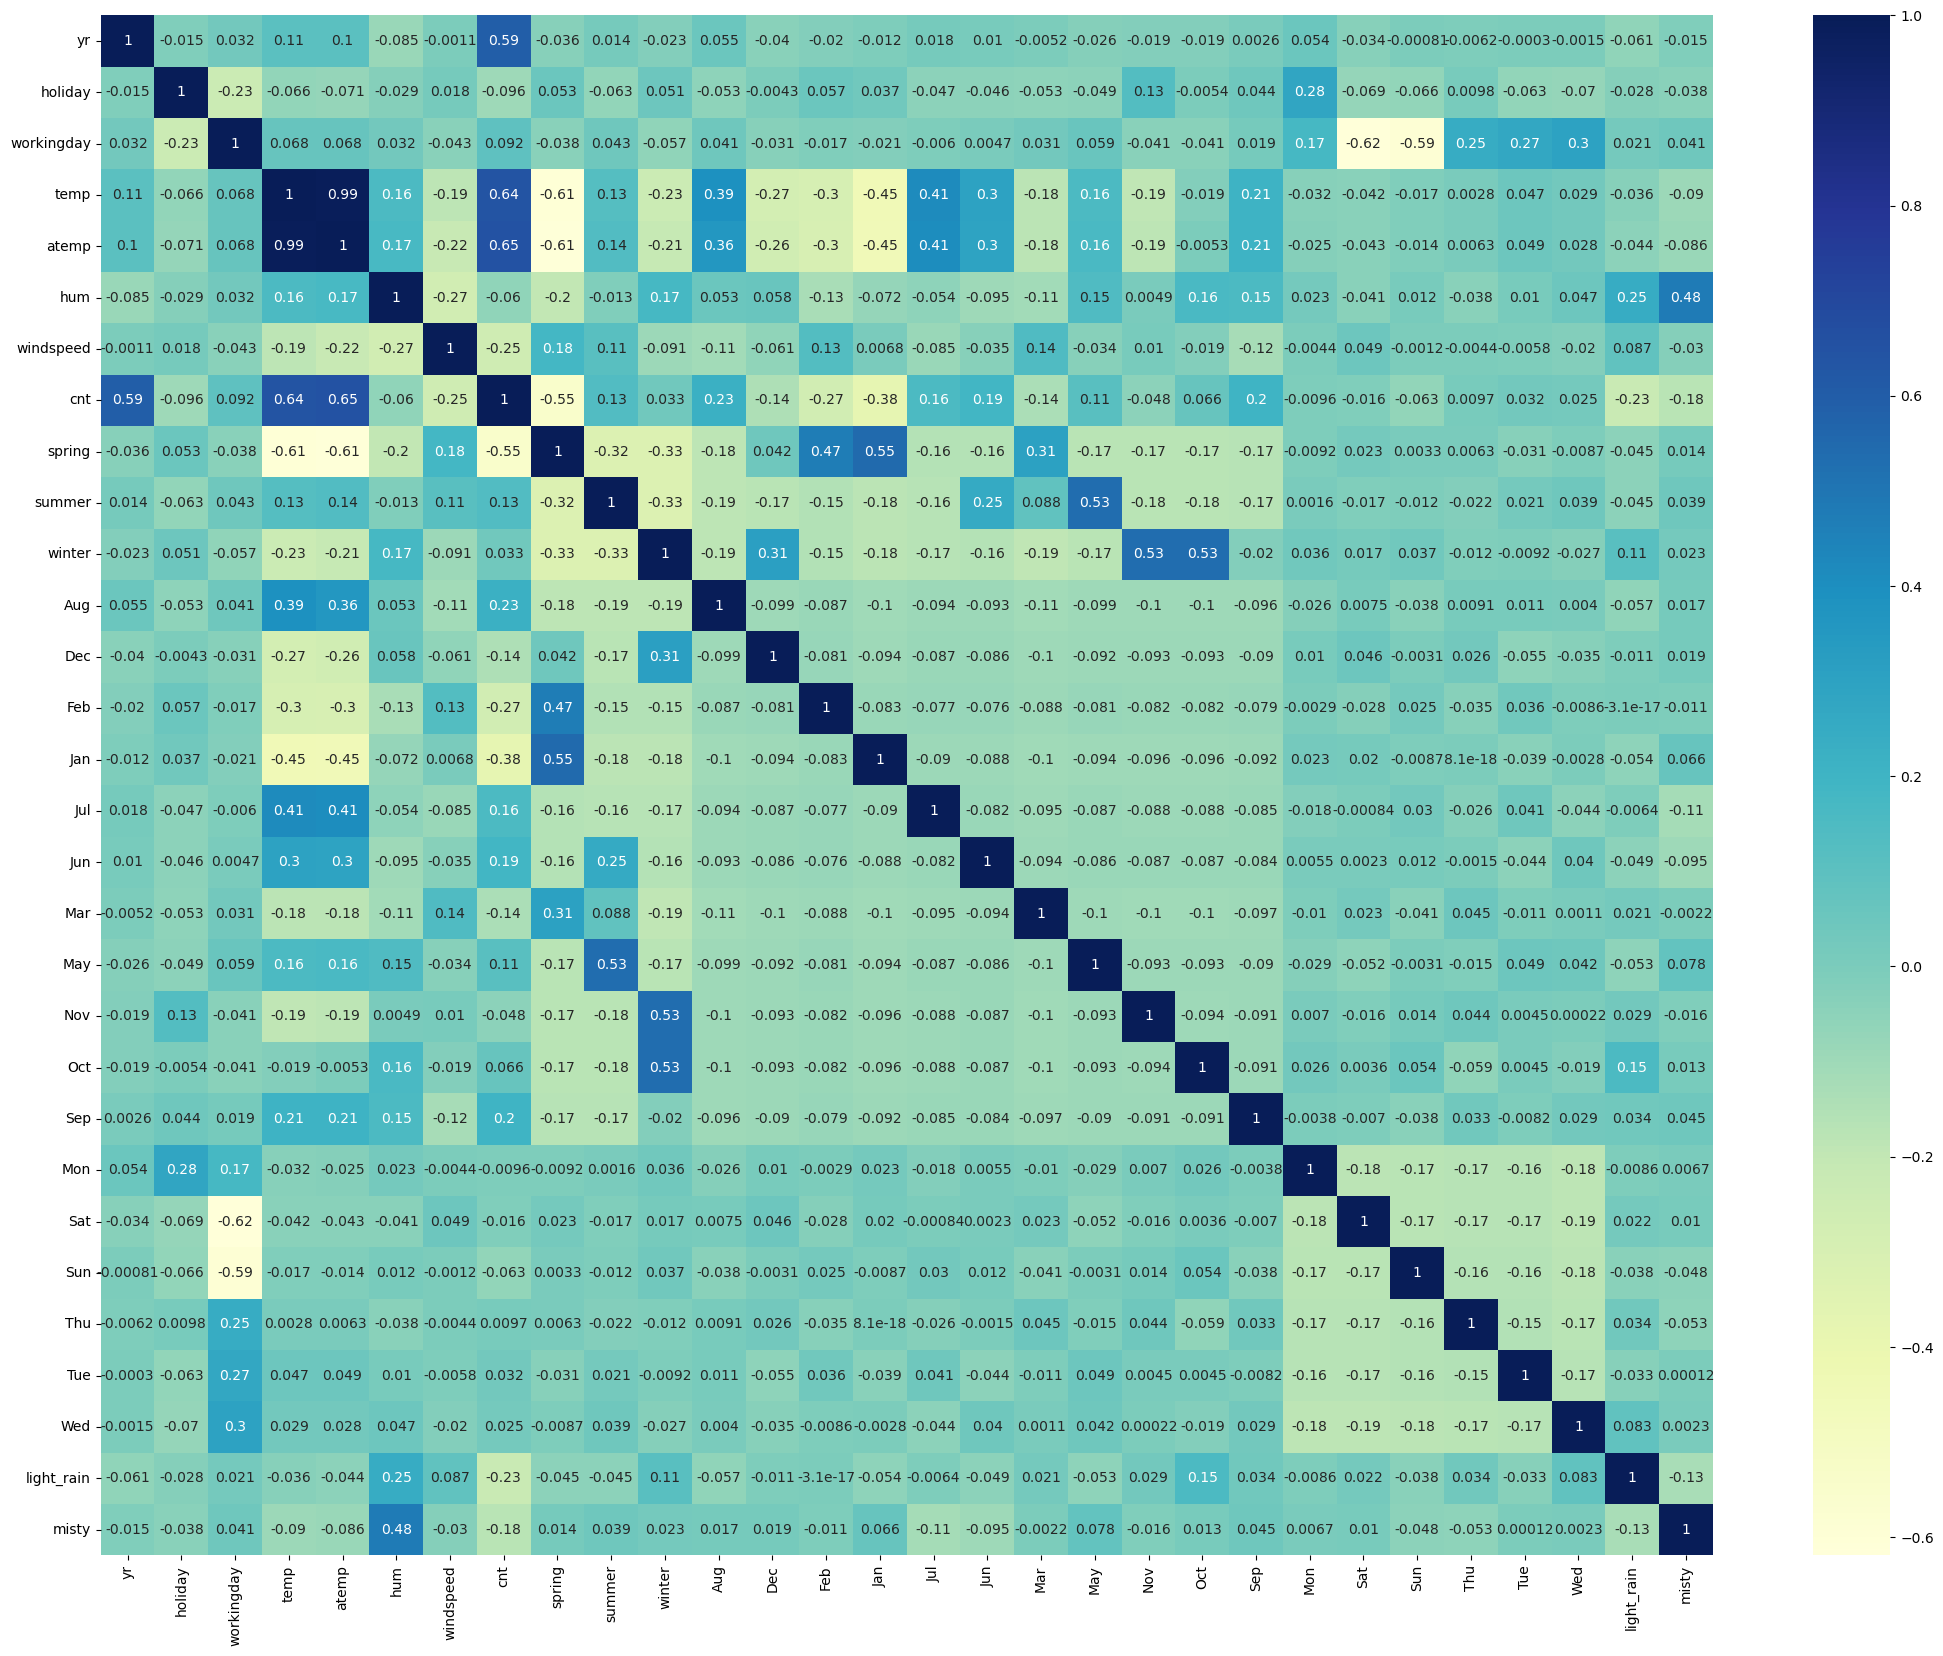

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see here,
- `temp` and `atemp` are highly correlated (0.99)
- `cnt` has a high correlation with `temp` & `atemp` followed by `yr`
- `spring` is negatively correlated with `cnt`
- `workingday` has a negative correlation with sat,sun
- `hum` and `misty` are also positively correlated (0.48)
- We can see a good correlation between May and summer & oct,nov and winter which is fairly acceptable.
<br><br>
Let's see a pairplot for cnt with temp, atemp and yr

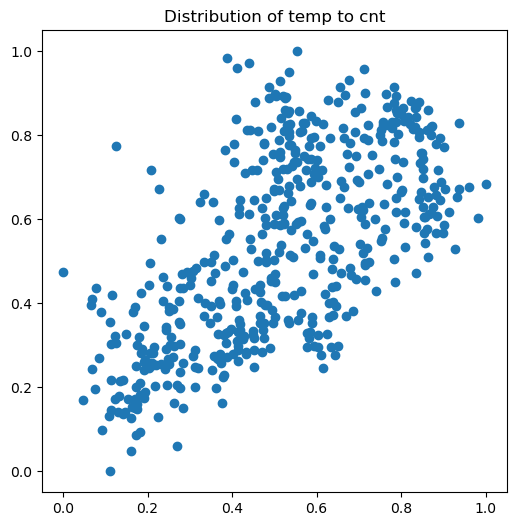

In [39]:
#temp

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.title("Distribution of temp to cnt", fontsize = 12)
plt.show()

This shows a linear relationship.

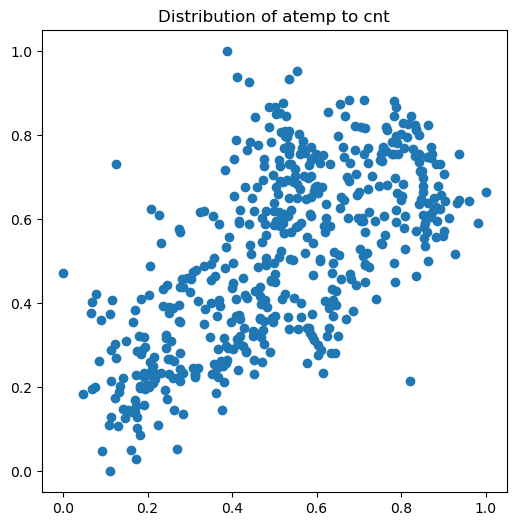

In [40]:
#atemp

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.title("Distribution of atemp to cnt", fontsize = 12)
plt.show()

This shows a linear relationship.

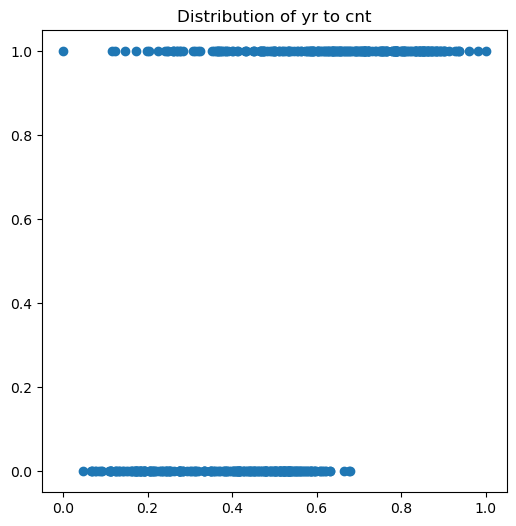

In [41]:
#yr

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.yr)
plt.title("Distribution of yr to cnt", fontsize = 12)
plt.show()

#### Inference
- Number of bikes booked in year 2019 is more compared to 2018.

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

#### RFE

Recursive feature elimination

In [43]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)

# running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
# selected columns

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 4),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thu', False, 7),
 ('Tue', False, 3),
 ('Wed', False, 5),
 ('light_rain', True, 1),
 ('misty', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Nov',
       'Sep', 'Sat', 'light_rain', 'misty'],
      dtype='object')

In [46]:
# eliminated columns

X_train.columns[~rfe.support_]

Index(['Aug', 'Mar', 'May', 'Oct', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.29e-188
Time:                        17:04:19   Log-Likelihood:                 525.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.038      7.536      0.0


Lets check the VIF now.

In [51]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Nov', 'Sep', 'Sat', 'light_rain', 'misty'],
      dtype='object')

In [52]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,386.48
4,atemp,369.31
5,hum,33.45
7,spring,5.73
2,workingday,5.40
6,windspeed,5.08
9,winter,4.28
8,summer,3.10
12,Jan,2.45
19,misty,2.33


#### Dropping the variable and updating the model

Both `temp` and `atemp` has very high VIF values. But `atemp` has higher p-value.
<br> Lets drop `atemp` and rebuild the model

In [54]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.67e-189
Time:                        17:04:20   Log-Likelihood:                 525.70
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2847      0.038      7.544      0.0

In [55]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [56]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.43
3,temp,23.29
6,spring,5.62
2,workingday,5.40
5,windspeed,4.83
8,winter,4.12
7,summer,2.96
11,Jan,2.44
18,misty,2.33
0,yr,2.11


#### Dropping the variable and updating the model

`hum` has a very high VIF. Lets rebuild the model after dropping `hum`

In [57]:
X_train_new = X_train_rfe.drop(["atemp","hum"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.82e-187
Time:                        17:04:20   Log-Likelihood:                 517.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     491   BIC:                            -916.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2167      0.034      6.327      0.0

In [58]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Nov', 'Sep',
       'Sat', 'light_rain', 'misty'],
      dtype='object')

In [59]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [60]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,8.40
2,workingday,5.38
4,windspeed,4.74
5,spring,4.58
7,winter,3.12
6,summer,2.34
10,Jan,2.25
0,yr,2.08
15,Sat,2.00
9,Feb,1.89


#### Dropping the variable and updating the model

We will drop `Jun` now as it has a high p-value.

In [61]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.80e-188
Time:                        17:04:20   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2187      0.034      6.474      0.0

In [62]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.30
2,workingday,5.35
4,windspeed,4.73
5,spring,4.55
7,winter,3.07
6,summer,2.33
10,Jan,2.24
0,yr,2.08
14,Sat,1.99
9,Feb,1.89


#### Dropping the variable and updating the model

We will drop `Feb` now as it has a high p-value.

In [63]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.49e-188
Time:                        17:04:21   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2055      0.033      6.242      0.0

In [64]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.21
2,workingday,5.33
4,windspeed,4.72
5,spring,3.17
7,winter,3.03
6,summer,2.33
0,yr,2.08
13,Sat,1.99
11,Nov,1.81
9,Jan,1.68


#### Dropping the variable and updating the model

We will drop `Nov` now as it has a high p-value.

In [65]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb","Nov"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.47e-188
Time:                        17:04:21   Log-Likelihood:                 513.18
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     494   BIC:                            -926.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1876      0.032      5.841      0.0

In [66]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.12
2,workingday,5.29
4,windspeed,4.68
5,spring,3.17
6,summer,2.33
7,winter,2.21
0,yr,2.08
12,Sat,1.99
9,Jan,1.67
10,Jul,1.59


#### Dropping the variable and updating the model

We will drop `Dec` now as it has a high p-value.

In [67]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb","Nov","Dec"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.33e-189
Time:                        17:04:21   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [68]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


#### Dropping the variable and updating the model

We will drop `Jan` now as it has a high p-value.

In [69]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb","Nov","Dec","Jan"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.73e-189
Time:                        17:04:21   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

In [70]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
10,Sat,1.96
8,Jul,1.58
12,misty,1.56


#### Dropping the variable and updating the model

We will drop `Jul` now as it has a high p-value.

In [71]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb","Nov","Dec","Jan","Jul"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.48e-188
Time:                        17:04:21   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1484      0.031      4.832      0.0

In [72]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
5,spring,2.40
0,yr,2.07
6,summer,2.00
9,Sat,1.96
7,winter,1.83
11,misty,1.56
8,Sep,1.24


#### Dropping the variable and updating the model

We will drop `spring` now as it has a high p-value.

In [73]:
X_train_new = X_train_rfe.drop(["atemp","hum","Jun","Feb","Nov","Dec","Jan","Jul","spring"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.92e-188
Time:                        17:04:22   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0849      0.019      4.443      0.0

In [74]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,yr,2.02
8,Sat,1.76
5,summer,1.57
10,misty,1.53
6,winter,1.42
7,Sep,1.21
1,holiday,1.12


Now we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [75]:
lm.params

const         0.084901
yr            0.232913
holiday      -0.057089
workingday    0.047862
temp          0.547727
windspeed    -0.154257
summer        0.086798
winter        0.132127
Sep           0.099248
Sat           0.059118
light_rain   -0.289291
misty        -0.081844
dtype: float64

### Check the various assumptions.

<font color = blue>**1. Linear relationship**</font>

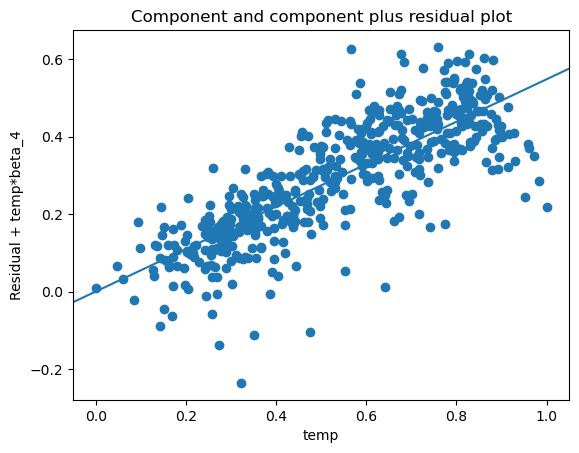

In [76]:
sm.graphics.plot_ccpr(lm,"temp")
plt.show()

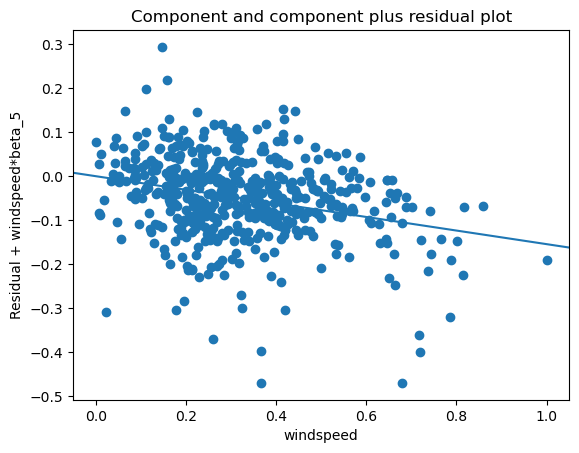

In [77]:
sm.graphics.plot_ccpr(lm,"windspeed")
plt.show()

We can see a linear relationship here.

<font color = blue>**2. Homoscedasticity**</font>

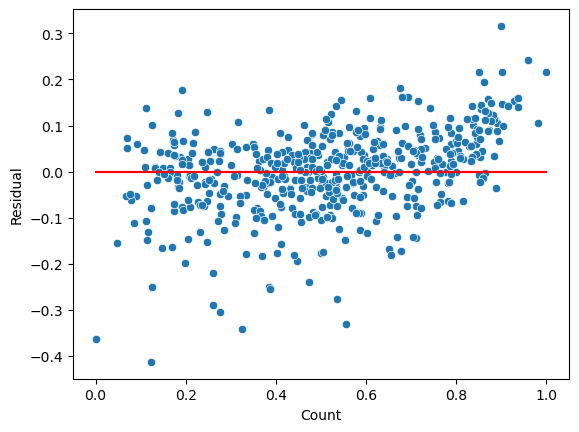

In [78]:
y_train_pred = lm.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

There seems to be no pattern or trend in the residual values.

<font color = blue>**3. No muticollinearity**</font>

we saw the VIF values and all are less than 5.
<br>Lets check from heatmap now.

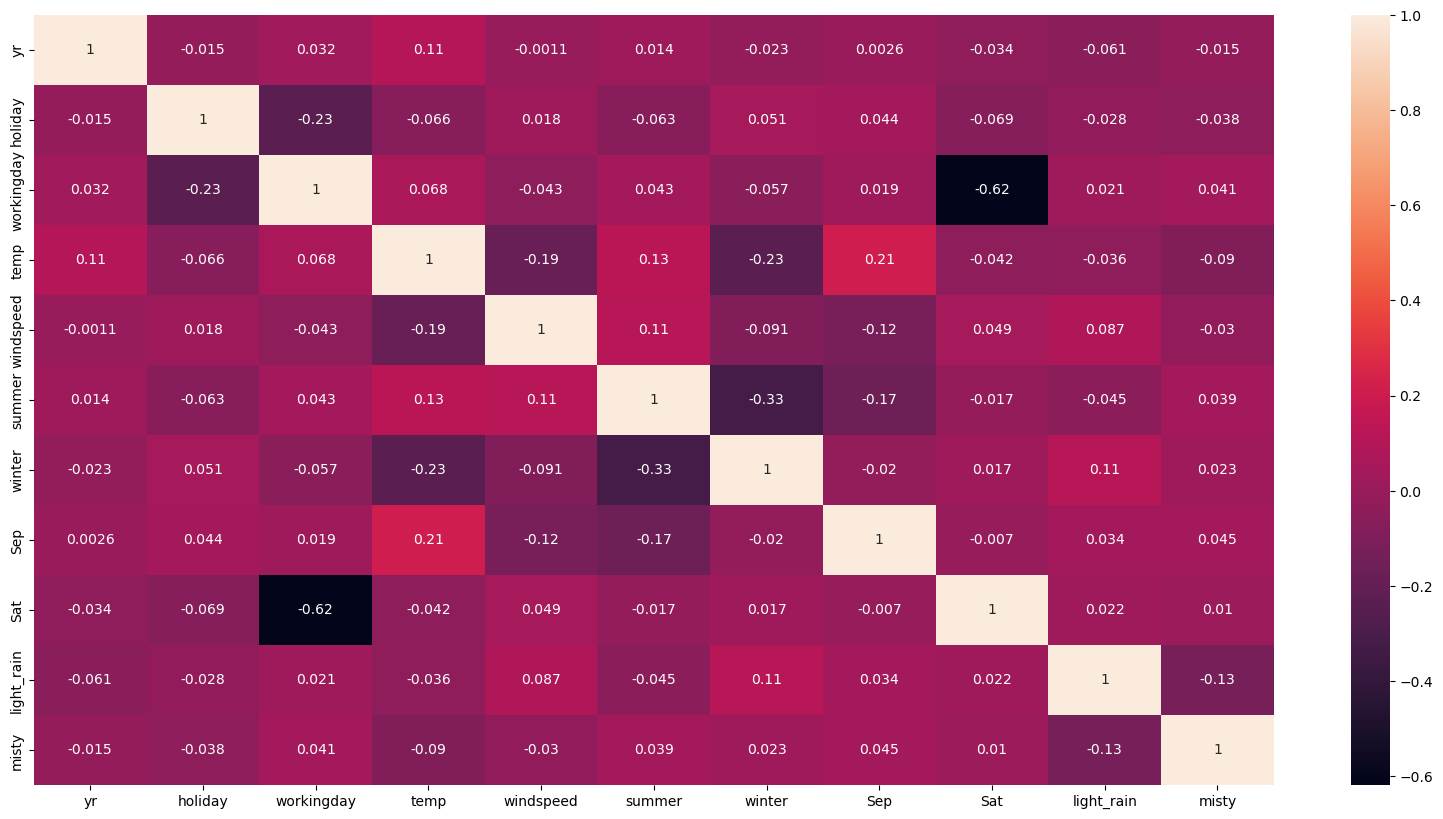

In [79]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

<font color = blue>**4. Error terms are normally distributed**</font>

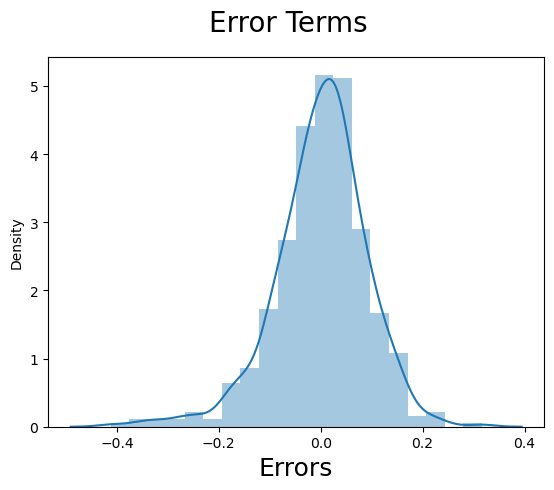

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual,bins=20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   
plt.show()

It is a normal distribution.

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. lr_14 model.

#### Applying the scaling on the test sets

In [81]:
rescale_vars = ['temp','atemp', 'hum', 'windspeed','cnt']

df_test[rescale_vars] = scaler.transform(df_test[rescale_vars])

In [82]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light_rain,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [83]:
y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Sat', 'light_rain', 'misty'],
      dtype='object')

In [85]:
X_test=X_test[X_train_new.columns]

In [86]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [87]:
# Making predictions using the lm model

y_pred= lm.predict(X_test_lm)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

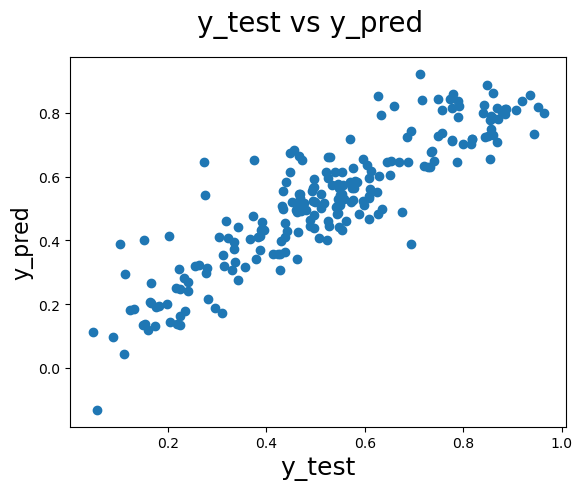

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

<font color = blue>**R square calculation**</font>

1. test data set

In [89]:
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.796288126082227


2. train data set

In [90]:
r2_train = r2_score(y_train,y_train_pred)
print(r2_train)

0.8371634859985762


<font color = blue>**Adjusted R square calculation**</font>

1. test data set

In [91]:
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(adj_r2_test)

0.7854628574199298


2. train data set

In [92]:
n = X_train.shape[0]
p = X_train.shape[1]

adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(adj_r2_train)

0.8273254466109901


We can see that there is not much deviations in the values of r square and adjusted r square when we compare for both test and training data set. 
<br> The difference is less tha 5% which suggested it is a good model

<font color = blue>**RMSE**</font>
<br>Root Mean Squared Error

In [93]:
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.09836391656259555


In [94]:
mean_absolute_error(y_test, y_pred)

0.07559984799794739

We can see that mean squared error and mean absolute error values are 0.0983 and 0.0755 respectively which indicates that the model we derived is good.

### Final Model

In [95]:
lm.params

const         0.084901
yr            0.232913
holiday      -0.057089
workingday    0.047862
temp          0.547727
windspeed    -0.154257
summer        0.086798
winter        0.132127
Sep           0.099248
Sat           0.059118
light_rain   -0.289291
misty        -0.081844
dtype: float64

Based on the coefficients we can say, below are the list of important variables in the order of there importance:
<br>
- **temp** : 0.547727 indicates that temperature has a significant impact on bookings
- **light_rain** : -0.289291 indicates that snow & rain are negatively impacting the bookings
- **yr** : 0.232913 indicates that the bookings of bike has increased over year
- **windspeed** : -0.154257 indicates that bike bookings decreases with increase in windspeed
- **winter** : 0.132127 indicates that bike booking is preferrable during winter season

<font color = blue>**Inference**</font>
<br>
- We can say that with increase in temperature and good weather condition positively affects the bike booking.
- We can dock more bikes based on the weather forcast( Clear > Misty > Rainy)
- Summer & Winters have more bike bookings, so we can promote, advertise more during these seasons
- Month september and day saturday also shows positive relationship with bike bookings
- There is a increase in bike bookings over the year. Once the lockdown opens, we can see the increase in bookings as well
- We can offer discounts may be to increase the bike bookings during spring season, cloudy and rainy weather etc.

We can see that the equation of our best fitted line is:

$ cnt = (0.547727 * temp) + (0.232913 * yr) + (0.132127 * winter) + (0.099248 * Sep) + (0.086798 * summer) + (0.059118 * Sat) + (0.047862 * workingday) - (0.289291 * light_rain) - (0.154257 * windspeed) - (0.057089 * holiday) - (0.081844 * misty)
